In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# 1. Open the categoricals variable we created before
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
# Renaming columns
cols = []
for column in customer_df.columns:
    column=column.replace(' ', '_')
    cols.append(column.lower())
customer_df.columns = cols

In [4]:
categoricals = customer_df.select_dtypes(include = object)
categoricals= categoricals.drop(['customer'], axis=1)
categoricals

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [5]:
# 2. Plot all the categorical variables with the proper plot. What can you see?
def plot_categorical_variables (df):
    for column in df.columns:
        sns.displot(df[column])
        plt.xticks(rotation=90)
        plt.show()

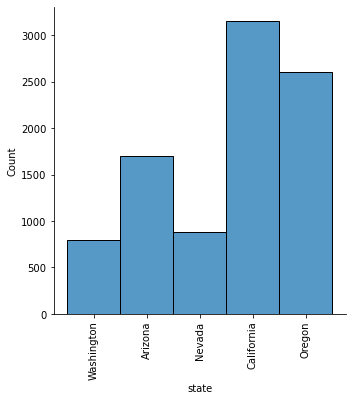

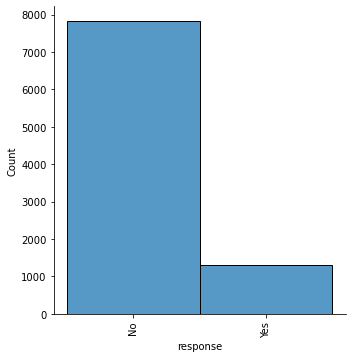

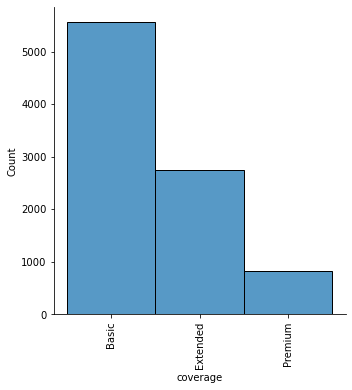

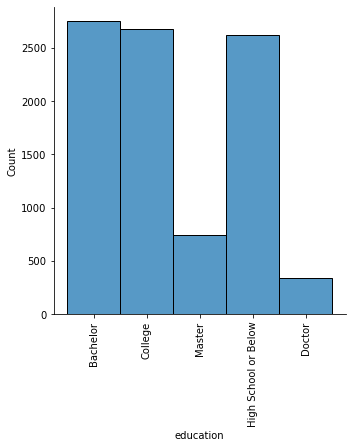

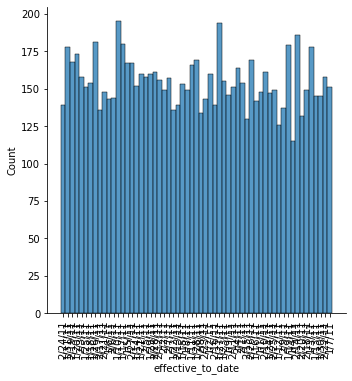

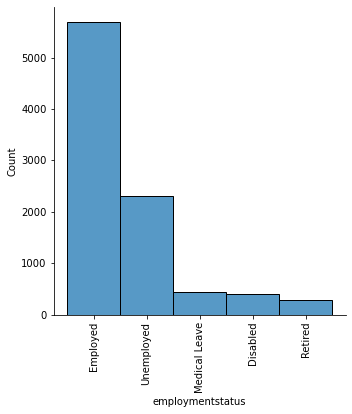

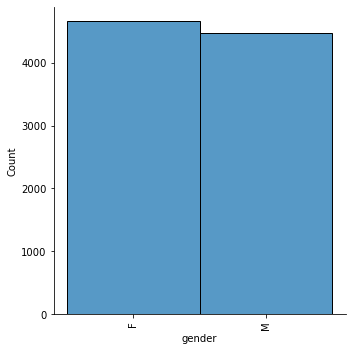

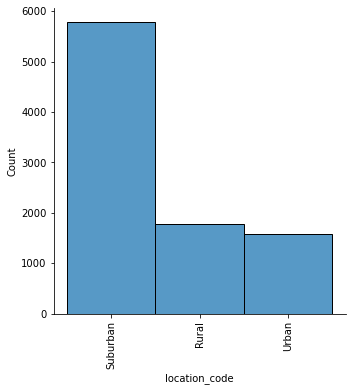

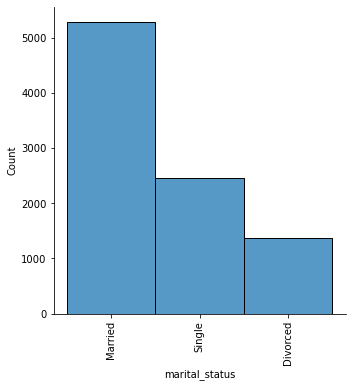

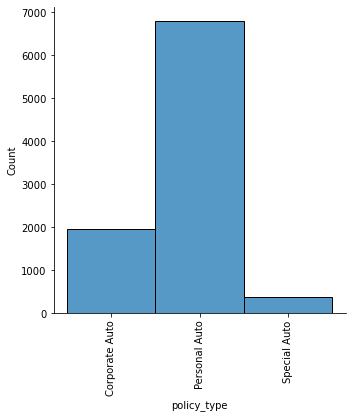

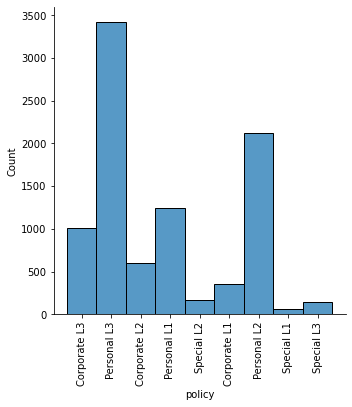

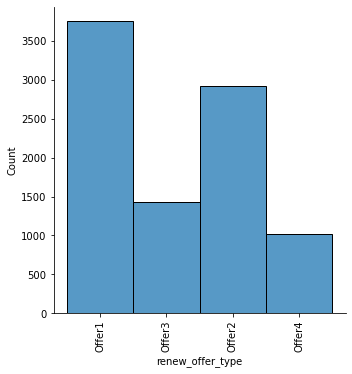

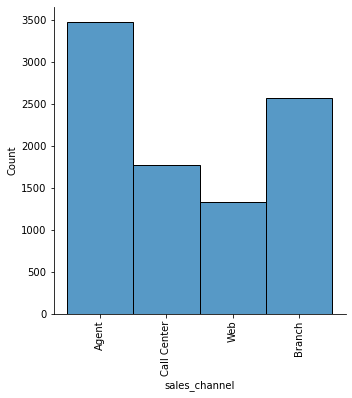

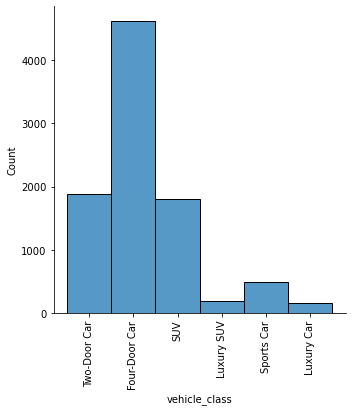

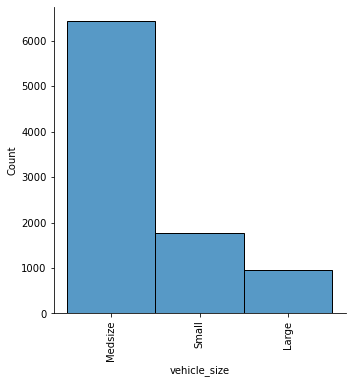

In [6]:
plot_categorical_variables (categoricals)

In [7]:
# For each variable, some values are more common than others. Using that most common values, it is possible to 
# define the most common customer's profile.

In [8]:
# 3. There might be some columns that seem to be redundant, check their values to be sure. 
# What should we do with them?

In [9]:
data_crosstab = pd.crosstab(categoricals['policy_type'], categoricals['policy'], margins = False)
data_crosstab

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


In [10]:
# Information of 'policy_type' column (Corporate Auto, Personal, Special) is included 
# in 'policy' column, I guess I can drop it.
categoricals= categoricals.drop(['policy_type'], axis=1)

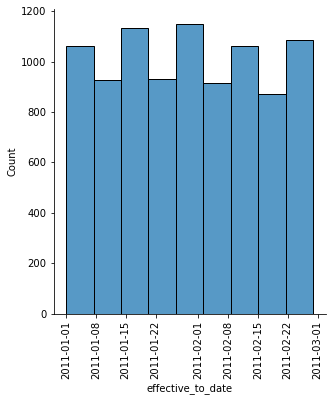

In [17]:
# 4. Plot time variable. Can you extract something from it?
categoricals['effective_to_date'] = pd.to_datetime(categoricals['effective_to_date'], errors='coerce')
sns.displot(categoricals['effective_to_date'], bins=9)
plt.xticks(rotation=90)
plt.show()

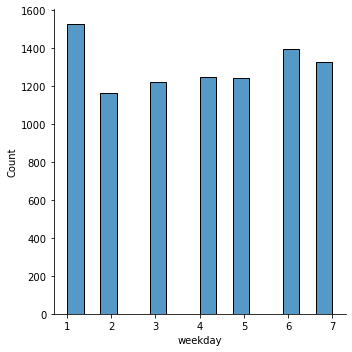

In [13]:
# Data includes 2 complete months. May be interesting to extract the corresponding day of week and create a new column with it
categoricals['weekday']=list(map(lambda x: x.isoweekday(), categoricals['effective_to_date']))
sns.displot(categoricals['weekday'])
plt.show()

In [ ]:
# Mondays has the highest value, followed by weekends, and then Tuesday to Friday with similar values.